# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Analyzing the changes of inflation rate in Indonesia by comparing inflation rate on monthly basis and yearly basis.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [85]:
import requests

url_get = requests.get('https://pusatdata.kontan.co.id/makroekonomi/inflasi')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [86]:
url_get.content[1:500]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="shortcut icon" href="//assets.kontan.co.id/favicon.ico"/>\n    <link rel="stylesheet" href="https://asset.kontan.co.id/general/third-party/font-awesome-4.7.0/css/fo'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [87]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*Here we want to extract the inflation data from the website and analyze the data using pandas.* We only extract the data that we need, in this case: date, inflation rate MoM, and inflation rate YoY.

In [88]:
table = soup.find('div',attrs={'class':'baris-scroll'})
print(table.prettify()[1:500])

div class="baris-scroll">
 <div class="tabel-body">
  <div class="kol-konten3-1">
   31/12/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,44
   </div>
  </div>
  <div class="kol-konten3-3">
   <div class="w-30-px txtright center-max">
    1,57
   </div>
  </div>
 </div>
 <div class="tabel-body">
  <div class="kol-konten3-1">
   30/11/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,30
   </div>
  </div


In [89]:
table.find_all('div', attrs={'class','kol-konten3-1'})[:5]

[<div class="kol-konten3-1">31/12/2024</div>,
 <div class="kol-konten3-1">30/11/2024</div>,
 <div class="kol-konten3-1">31/10/2024</div>,
 <div class="kol-konten3-1">30/09/2024</div>,
 <div class="kol-konten3-1">31/08/2024</div>]

Next, we need to find the row length.

In [90]:
row = table.find_all('div', attrs={'class':'kol-konten3-1'})
row_length = len(row)
row_length

50

Do the scrapping process here. We need to extract the content from the 'div' element and do this step for all 3 columns: period, inflation mom, inflation yoy.

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [91]:
temp = [ ]  #init Initiating a tuple

for i in range(0, row_length):

    #get period
    period = table.find_all('div', attrs={'class':'kol-konten3-1'})[i].text

    #get inflation_mom
    inflation_mom = table.find_all('div', attrs={'class':'kol-konten3-2'})[i].text
    inflation_mom = inflation_mom.strip() #to remove excess white space

    #get inflation_yoy
    inflation_yoy = table.find_all('div', attrs={'class':'kol-konten3-3'})[i].text
    inflation_yoy = inflation_yoy.strip() #to remove excess white space

    temp.append((period,inflation_mom,inflation_yoy))
    
temp

[('31/12/2024', '0,44', '1,57'),
 ('30/11/2024', '0,30', '1,55'),
 ('31/10/2024', '0,08', '1,71'),
 ('30/09/2024', '0,12', '1,84'),
 ('31/08/2024', '0,03', '2,12'),
 ('31/07/2024', '0,18', '2,13'),
 ('30/06/2024', '0,08', '2,51'),
 ('31/05/2024', '0,03', '2,84'),
 ('30/04/2024', '0,25', '3,00'),
 ('31/03/2024', '0,52', '3,05'),
 ('29/02/2024', '0,37', '2,75'),
 ('31/01/2024', '0,04', '2,57'),
 ('31/12/2023', '0,41', '2,61'),
 ('30/11/2023', '0,38', '2,86'),
 ('31/10/2023', '0,17', '2,56'),
 ('30/09/2023', '0,19', '2,28'),
 ('31/08/2023', '0,02', '3,27'),
 ('31/07/2023', '0,21', '3,08'),
 ('30/06/2023', '0.14', '3.52'),
 ('31/05/2023', '0.09', '4.00'),
 ('30/04/2023', '0,33', '4,33'),
 ('31/03/2023', '0.18', '4.97'),
 ('28/02/2023', '0,16', '5,47'),
 ('31/01/2023', '0,34', '5,28'),
 ('31/12/2022', '0,66', '5,51'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/08/2022', '0,21', '4,69'),
 ('31/07/2022', '0,64', '4,94'),
 ('30/06/2

The result above shows the data from the current date to previous dates. Now, reverse the data from the initial date to current date

In [92]:
temp = temp[::-1]
temp

[('30/11/2020', '0,28', '1.59'),
 ('31/12/2020', '0,45', '1.68'),
 ('31/01/2021', '0,26', '1.55'),
 ('28/02/2021', '0,10', '1.38'),
 ('31/03/2021', '0,08', '1,37'),
 ('30/04/2021', '0,13', '1,42'),
 ('31/05/2021', '0,32', '1,68'),
 ('30/06/2021', '0,16', '1,33'),
 ('31/07/2021', '0,08', '1,52'),
 ('31/08/2021', '0,03', '1,59'),
 ('30/09/2021', '0,04', '1,60'),
 ('31/10/2021', '0,12', '1,66'),
 ('30/11/2021', '0,37', '1,75'),
 ('31/12/2021', '0,57', '1,87'),
 ('31/01/2022', '0,56', '2,18'),
 ('28/02/2022', '0,54', '2,06'),
 ('31/03/2022', '0.66', '2.64'),
 ('30/04/2022', '0,95', '3,47'),
 ('31/05/2022', '0,40', '3,55'),
 ('30/06/2022', '0.61', '4.35'),
 ('31/07/2022', '0,64', '4,94'),
 ('31/08/2022', '0,21', '4,69'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/12/2022', '0,66', '5,51'),
 ('31/01/2023', '0,34', '5,28'),
 ('28/02/2023', '0,16', '5,47'),
 ('31/03/2023', '0.18', '4.97'),
 ('30/04/2023', '0,33', '4,33'),
 ('31/05/2

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [93]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('period','inflation_mom','inflation_yoy'))
df.head()

,period,inflation_mom,inflation_yoy
0,30/11/2020,"0,28",1.59
1,31/12/2020,"0,45",1.68
2,31/01/2021,"0,26",1.55
3,28/02/2021,"0,10",1.38
4,31/03/2021,"0,08","1,37"


### Data Cleansing

changing the type from object to datetime & float

In [94]:
df.dtypes

period           object
inflation_mom    object
inflation_yoy    object
dtype: object

In [95]:
df['inflation_mom'] = df['inflation_mom'].astype('str')
df['inflation_yoy'] = df['inflation_yoy'].astype('str')
df['period'] = df['period'].astype('datetime64[ns]')

In [96]:
df['inflation_mom'] = df['inflation_mom'].str.replace(",",".")
df['inflation_yoy'] = df['inflation_yoy'].str.replace(",",".")

In [97]:
df['inflation_mom'] = df['inflation_mom'].astype('float64')
df['inflation_yoy'] = df['inflation_yoy'].astype('float64')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   period         50 non-null     datetime64[ns]
 1   inflation_mom  50 non-null     float64       
 2   inflation_yoy  50 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [99]:
df.head()

,period,inflation_mom,inflation_yoy
0,2020-11-30,0.28,1.59
1,2020-12-31,0.45,1.68
2,2021-01-31,0.26,1.55
3,2021-02-28,0.10,1.38
4,2021-03-31,0.08,1.37


### Data Visualization

to visualize it nicely and make it easy to read, set the period column as the index. then, choose which kind of plot that can represent the data nicely. in this case, line chart is easier to read.

In [100]:
df = df.set_index('period')
df.head()

,inflation_mom,inflation_yoy
period,,
2020-11-30,0.28,1.59
2020-12-31,0.45,1.68
2021-01-31,0.26,1.55
2021-02-28,0.10,1.38
2021-03-31,0.08,1.37


<Axes: xlabel='period'>

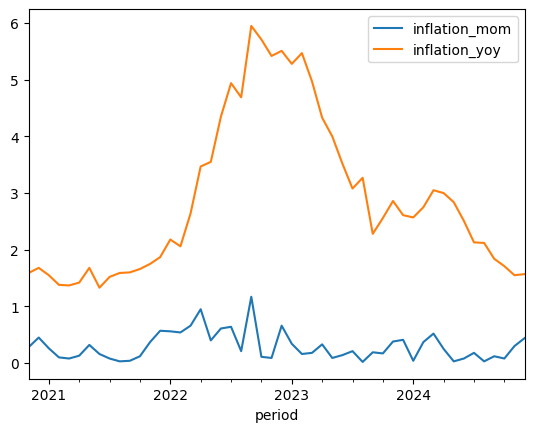

In [101]:
df.plot()

Inflation in Indonesia drastically jumped to almost 6% by the end of 2022. The inflation show a modest declined between Q4 of 2022 and Q1 of 2023, and continue to decline towards the end of year of 2024 with fluctuations. To conclude, the inflation rate during 2022-2023 is marked as the biggest increased inflation year on year. 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.